In [ ]:
#!pip install sklearn seaborn

In [1]:
# importando as bibliotecas para leitura dos dados e criação de gráficos
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns


# configurando pandas para mostrar todas as linhas e colunas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) 

# configurando pandas para não mostrar notação científica para números
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
# Ler os dados do seguro
df_seguro = pd.read_csv('./data/insurance.csv')
df_seguro.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [3]:
# Avaliando a quantidade de linhas e colunas
df_seguro.shape

(1338, 7)

In [5]:
# Avaliando os tipos
df_seguro.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
df_seguro.info() # Verificando se existe dados faltantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## <a> Começando com estatística descritiva </a>

Conhecer bem as medidas estatísticas, de tendência central, dispersão, separatrizes, distribuições, é essencial para conhecermos melhor os dados em que estamos trabalhando. Qual a distribuição da idade? Índice de massa corporal? E a variável target?

In [8]:
df_seguro.describe()

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


<Axes: xlabel='age', ylabel='Count'>

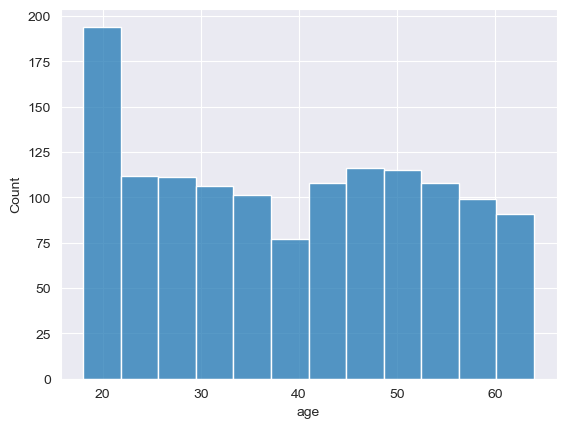

In [9]:
# Analisando as distribuições das idades
sns.set_style("darkgrid")
plt.tight_layout()

sns.histplot(data=df_seguro, x='age' )

<Axes: xlabel='bmi', ylabel='Count'>

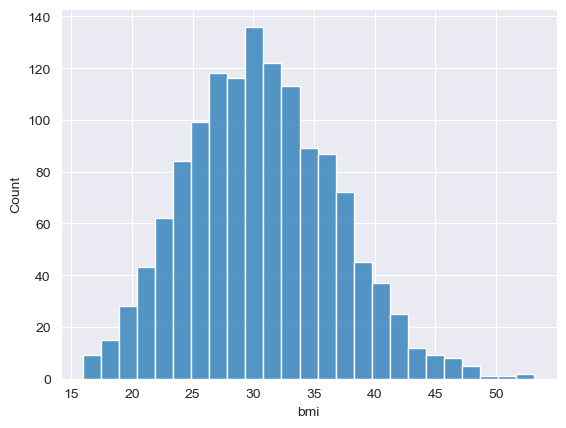

In [10]:
# Analisando as distribuições do índice de massa corporal
sns.set_style("darkgrid")
plt.tight_layout()

sns.histplot(data=df_seguro, x='bmi')

<Axes: xlabel='children', ylabel='count'>

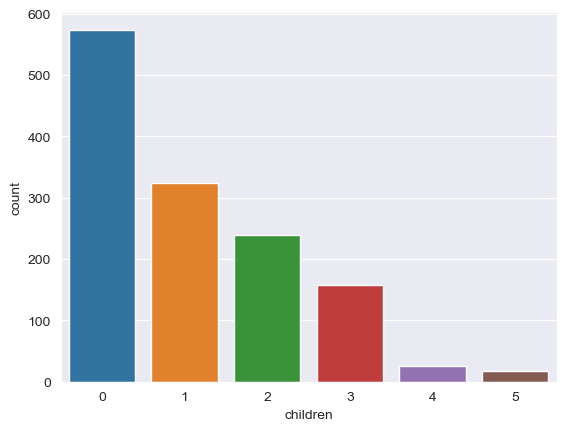

In [11]:
# Analisando as quantidades de crianças
sns.set_style("darkgrid")
plt.tight_layout()

sns.countplot(data=df_seguro, x='children')


<Axes: xlabel='charges', ylabel='Count'>

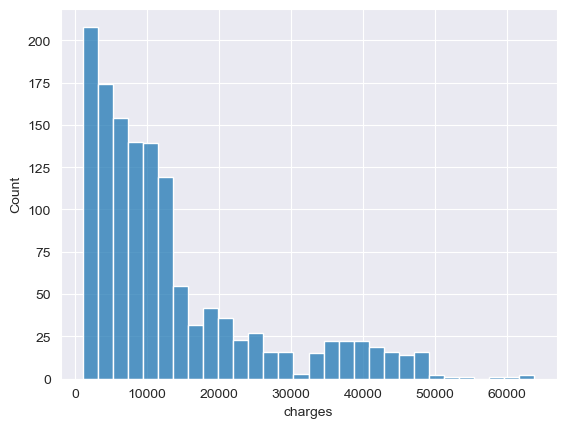

In [12]:
# Analisando a variável target: valor do seguro
sns.histplot(data=df_seguro['charges'])

## <a> Relação entre as features e a variável target </a>

Uma análise interessante é avaliar relações entre as variáveis preditoras com a target. Vamos analisar as dispersões das variáveis preditoras com o valor do seguro.

C:\Users\franc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


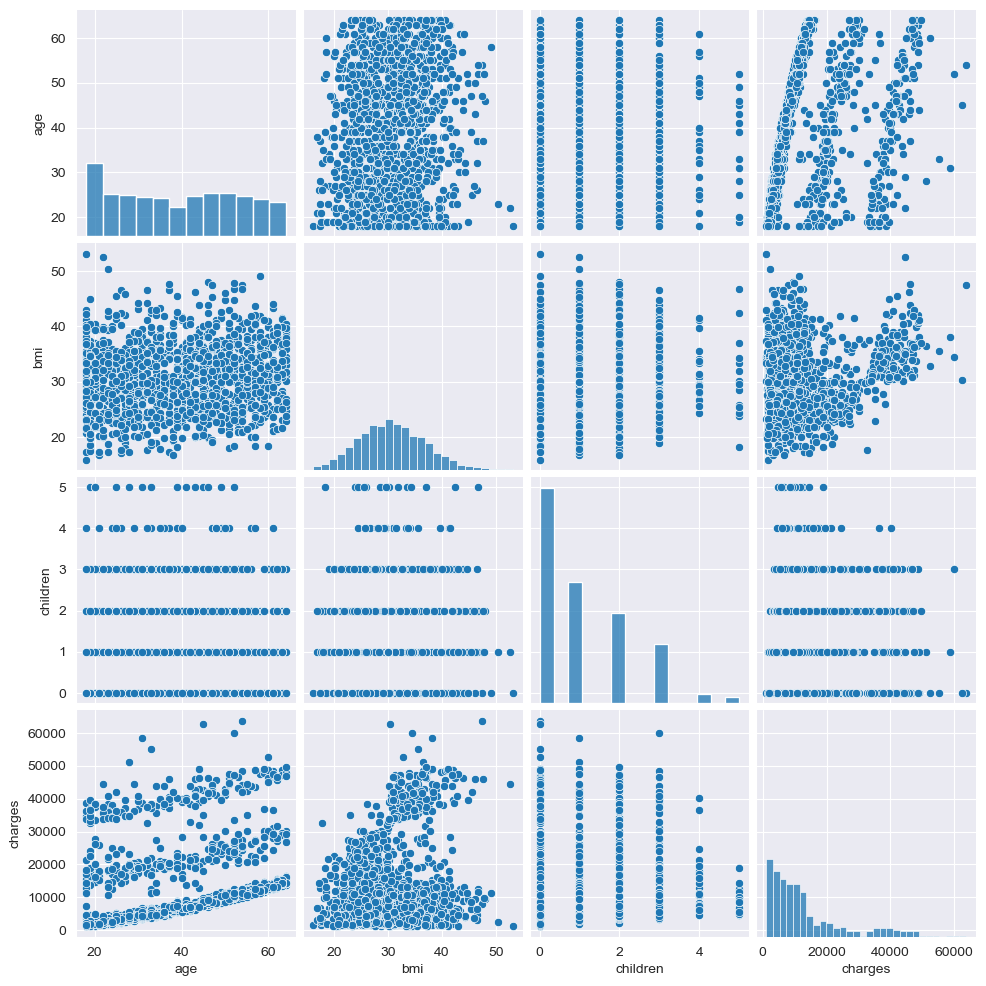

In [13]:
# O pairplot faz gráficos de dispersão para os pares de variáveis (incluindo a target)
# Na diagonal principal ele mostra o histograma
sns.pairplot(data=df_seguro)

Fica evidente uma correlação positiva entre idade e as cobranças de planos de saúde (age x charges). Provavelmente será uma variável de importância no modelo preditivo

## <a> Codificação de Variáveis Categóricas </a>

Lembrando que os modelos de machine learning não sabem o que são categorias em sua maioria, devemos, portanto, codificar as variáveis de sexo, fumante e localização.

In [14]:
df_seguro.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [15]:
# Como somente temos variáveis nominais, vamos utilizar One Hot Encoder
# Podemos utilizar o get_dummies do pandas, ou o OneHotEncoder do scikit learn
# Para variáveis somente com duas classes (sex e smoker), podemos fazer um mapeamento direto

df_seguro['female'] = df_seguro['sex'].map({'female': 1, 'male': 0})
df_seguro['smoker'] = df_seguro['smoker'].map({'yes': 1, 'no': 0})
df_seguro.head()

,age,sex,bmi,children,smoker,region,charges,female
0,19,female,27.90,0,1,southwest,16884.92,1
1,18,male,33.77,1,0,southeast,1725.55,0
2,28,male,33.00,3,0,southeast,4449.46,0
3,33,male,22.70,0,0,northwest,21984.47,0
4,32,male,28.88,0,0,northwest,3866.86,0


In [16]:
# podemos remover a coluna sex
df_seguro = df_seguro.drop('sex', axis=1)
df_seguro.head()

,age,bmi,children,smoker,region,charges,female
0,19,27.90,0,1,southwest,16884.92,1
1,18,33.77,1,0,southeast,1725.55,0
2,28,33.00,3,0,southeast,4449.46,0
3,33,22.70,0,0,northwest,21984.47,0
4,32,28.88,0,0,northwest,3866.86,0


In [17]:
df_seguro['region'].unique() # Identificando as regiões

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [18]:
# Para as regiões vamos usar OHE (One-Hot Encoding)
colunas_regiao = pd.get_dummies(df_seguro['region'], drop_first=True, dtype=int)
colunas_regiao.head()

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [19]:
# concat, concatena pandas dataframes, axis=1 ele junta colunas, axis=0 junta linhas
pd.concat([df_seguro, colunas_regiao], axis=1).head()

,age,bmi,children,smoker,region,charges,female,northwest,southeast,southwest
0,19,27.90,0,1,southwest,16884.92,1,0,0,1
1,18,33.77,1,0,southeast,1725.55,0,0,1,0
2,28,33.00,3,0,southeast,4449.46,0,0,1,0
3,33,22.70,0,0,northwest,21984.47,0,1,0,0
4,32,28.88,0,0,northwest,3866.86,0,1,0,0


In [20]:
# podemos remover a coluna region
df_seguro = pd.concat([df_seguro, colunas_regiao], axis=1)
df_seguro = df_seguro.drop('region', axis=1)
df_seguro.head()

,age,bmi,children,smoker,charges,female,northwest,southeast,southwest
0,19,27.90,0,1,16884.92,1,0,0,1
1,18,33.77,1,0,1725.55,0,0,1,0
2,28,33.00,3,0,4449.46,0,0,1,0
3,33,22.70,0,0,21984.47,0,1,0,0
4,32,28.88,0,0,3866.86,0,1,0,0


## <a> Determinando quem são variáveis preditoras (X) e variável target (y) </a>

Ou... definindo X e y. É a forma mais usual de chamar as variáveis.


In [22]:
df_seguro.columns

Index(['age', 'bmi', 'children', 'smoker', 'charges', 'female', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [23]:
X = df_seguro.drop('charges', axis=1) # tirando a variável dependente
y = df_seguro[['charges']] # extraindo a variável dependente

In [24]:
# Variáveis preditoras (ou independentes ou, features)
X.head()

,age,bmi,children,smoker,female,northwest,southeast,southwest
0,19,27.90,0,1,1,0,0,1
1,18,33.77,1,0,0,0,1,0
2,28,33.00,3,0,0,0,1,0
3,33,22.70,0,0,0,1,0,0
4,32,28.88,0,0,0,1,0,0


In [25]:
# Variável dependente, ou target, ou label (ah, vcs entenderam :)
y.head()

,charges
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86


## <a> Separação de bases </a>

Agora vamos serparar as bases. Isso evita data leakage porque vamos fazer "feature scaling", por exemplo, e tais transformações deve ser realizadas DEPOIS do split (separação).

In [26]:
# A função que separa nossa base em treino e teste! 
# Lembrando que faremos cross validation com a base de treino
from sklearn.model_selection import train_test_split

In [27]:
# Devolve uma tupla com 4 elementos: X de treino, X de teste, y de treino, y de teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, # preditoras 
                                                        y, # target
                                                        test_size=.2, 
                                                        random_state=42)

# Vamos ver quantas linhas ficamos com treino e teste
X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((1070, 8), (268, 8), (1070, 1), (268, 1))

In [29]:
1070/1338 # Verificando a separação

0.7997010463378177

## <a> Feature Scaling </a>

Como usaremos pelo menos um modelo linear, é importante realizar scaling das features para mantê-las numa mesma escala de grandeza. Vamos de MinMaxScaler?

In [30]:
df_seguro.describe() 

,age,bmi,children,smoker,charges,female,northwest,southeast,southwest
count,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,0.20,13270.42,0.49,0.24,0.27,0.24
std,14.05,6.10,1.21,0.40,12110.01,0.50,0.43,0.45,0.43
min,18.00,15.96,0.00,0.00,1121.87,0.00,0.00,0.00,0.00
25%,27.00,26.30,0.00,0.00,4740.29,0.00,0.00,0.00,0.00
50%,39.00,30.40,1.00,0.00,9382.03,0.00,0.00,0.00,0.00
75%,51.00,34.69,2.00,0.00,16639.91,1.00,0.00,1.00,0.00
max,64.00,53.13,5.00,1.00,63770.43,1.00,1.00,1.00,1.00


In [31]:
# Normalização - MinMaxScaler, Padronização - StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Criar scaler
scaler = MinMaxScaler()

In [32]:
type(scaler)

sklearn.preprocessing._data.MinMaxScaler

In [33]:
scaler

MinMaxScaler()

In [34]:
colunas = X_treino.columns

# Parte importante!! Fit no treino! Transform no treino e teste
X_treino[colunas] = scaler.fit_transform(X_treino)
X_teste[colunas] = scaler.transform(X_teste)

X_treino.shape, X_teste.shape

((1070, 8), (268, 8))

In [35]:
X_treino.head() # Dados normalizados

,age,bmi,children,smoker,female,northwest,southeast,southwest
560,0.61,0.11,0.40,0.00,1.00,1.00,0.00,0.00
1285,0.63,0.22,0.00,0.00,1.00,0.00,0.00,0.00
1142,0.74,0.24,0.00,0.00,1.00,0.00,1.00,0.00
969,0.46,0.49,1.00,0.00,1.00,0.00,1.00,0.00
486,0.78,0.15,0.60,0.00,1.00,1.00,0.00,0.00


In [36]:
X_treino.describe()

,age,bmi,children,smoker,female,northwest,southeast,southwest
count,1070.00,1070.00,1070.00,1070.00,1070.00,1070.00,1070.00,1070.00
mean,0.46,0.39,0.22,0.21,0.49,0.24,0.26,0.25
std,0.31,0.16,0.24,0.40,0.50,0.43,0.44,0.43
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.20,0.28,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.47,0.38,0.20,0.00,0.00,0.00,0.00,0.00
75%,0.72,0.50,0.40,0.00,1.00,0.00,1.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [37]:
X_teste.describe()

,age,bmi,children,smoker,female,northwest,southeast,southwest
count,268.00,268.00,268.00,268.00,268.00,268.00,268.00,268.00
mean,0.45,0.41,0.21,0.20,0.52,0.26,0.30,0.23
std,0.30,0.17,0.23,0.40,0.50,0.44,0.46,0.42
min,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.17,0.29,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.43,0.40,0.20,0.00,1.00,0.00,0.00,0.00
75%,0.70,0.52,0.40,0.00,1.00,1.00,1.00,0.00
max,1.00,0.99,1.00,1.00,1.00,1.00,1.00,1.00


## <a> Analisando a correlação entre variáveis </a>

Quando utilizamos modelos lineares, é importante saber se as variáveis preditoras guardam alguma colinearidade. Caso ocorra, devemos remover uma das variáveis para que o modelo não seja afetado. 

<Axes: >

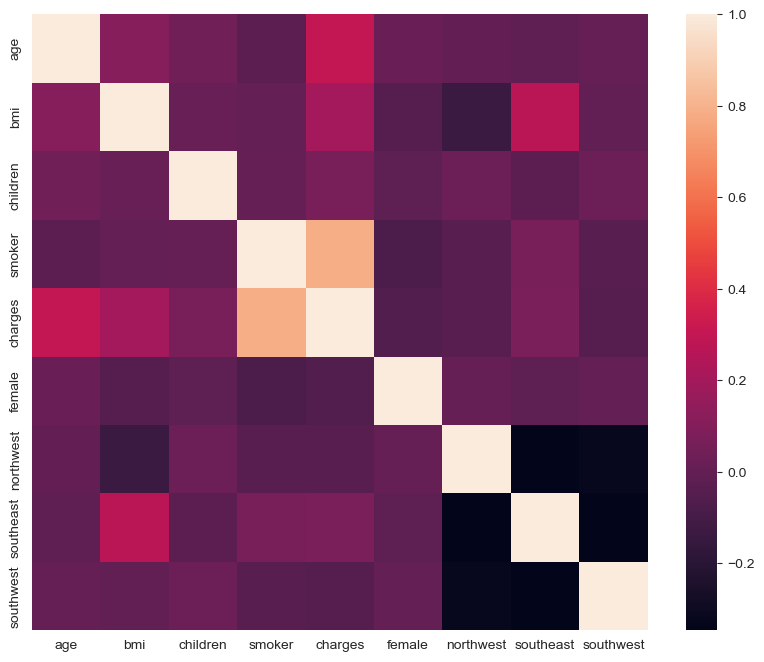

In [38]:
figura, graficos = plt.subplots(figsize=(10, 8))
corr = df_seguro.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), 
            square=True, ax=graficos)

## <a> Analisando se existem dados faltantes </a>

In [39]:
# isnull busca quem é nulo (dados faltantes)
df_seguro.isnull().sum()

age          0
bmi          0
children     0
smoker       0
charges      0
female       0
northwest    0
southeast    0
southwest    0
dtype: int64

## <a>Machine Learning</a>

Primeiro modelo que vamos treinar é a regressão linear. Lembrando que vamos utilizar cross validation para evitar overfit e ter uma base de comparação para outros modelos

## <a>Ilustração Cross Validation</a>
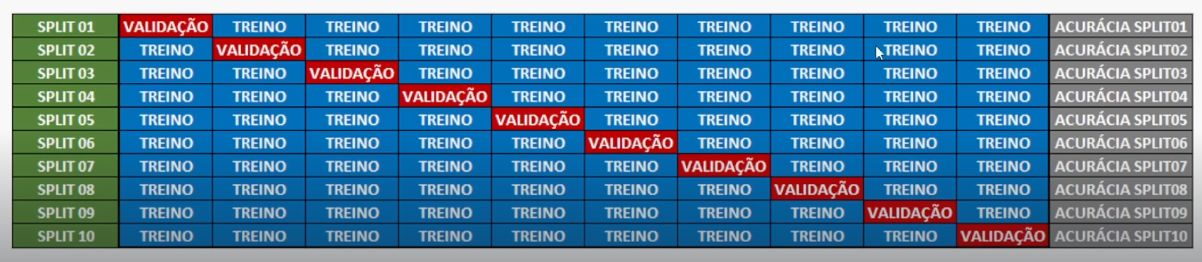
Fonte: Lets Data

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [41]:
# Criando o estimador, algorimo, modelo, preditor, regressor (virge, que tanto de nome!)
regressao_linear = LinearRegression()

# Vamos treinar utilizando cross validation
valores_rmse_rl = cross_val_score(estimator=regressao_linear, 
                                  X=X_treino, 
                                  y=y_treino, 
                                  cv=10, # 10-fold CV
                                  scoring='neg_root_mean_squared_error')
valores_rmse_rl

array([-6073.99997254, -6580.87166754, -5233.82683473, -6045.25239632,
       -5836.4647871 , -6127.43525895, -7281.08373608, -6321.52706355,
       -6193.3145481 , -5637.06299714])

In [42]:
len(valores_rmse_rl)

10

In [43]:
valores_rmse_rl = valores_rmse_rl * -1
valores_rmse_rl

array([6073.99997254, 6580.87166754, 5233.82683473, 6045.25239632,
       5836.4647871 , 6127.43525895, 7281.08373608, 6321.52706355,
       6193.3145481 , 5637.06299714])

In [44]:
media_rmse_rl = valores_rmse_rl.mean()
media_rmse_rl

6133.0839262055

### Arvore de regressão

In [46]:
from sklearn.tree import DecisionTreeRegressor

arvore_regressao = DecisionTreeRegressor()

# Vamos treinar utilizando cross validation (sempre!!)
valores_rmse_arvore = cross_val_score(estimator=arvore_regressao, 
                                      X=X_treino, 
                                      y=y_treino, 
                                      cv=10, # 
                                  scoring='neg_root_mean_squared_error')
valores_rmse_arvore

array([-6707.06191523, -7720.10834292, -7125.1924483 , -6863.51651898,
       -7203.99894158, -6059.00061217, -7343.28915519, -7140.72962265,
       -6853.26407469, -5980.48639551])

In [47]:
valores_rmse_arvore = valores_rmse_arvore * -1
valores_rmse_arvore

array([6707.06191523, 7720.10834292, 7125.1924483 , 6863.51651898,
       7203.99894158, 6059.00061217, 7343.28915519, 7140.72962265,
       6853.26407469, 5980.48639551])

In [48]:
media_rmse_arvore = valores_rmse_arvore.mean()
media_rmse_arvore

6899.664802722456

### E se retiramos as colunas de regiões. Na análise de correlação elas não mostraram muita influência na variável target

In [49]:
X_treino.columns

Index(['age', 'bmi', 'children', 'smoker', 'female', 'northwest', 'southeast',
       'southwest'],
      dtype='object')

In [51]:
# Vamos treinar utilizando cross validation (sempre!!)
colunas_regiao = ['northwest', 'southeast', 'southwest']
valores_rmse_rl_sem_regiao = cross_val_score(estimator=regressao_linear, 
                                             X=X_treino.drop(colunas_regiao, axis=1), 
                                             y=y_treino, 
                                             cv=10, 
                                      scoring='neg_root_mean_squared_error')
valores_rmse_rl_sem_regiao.mean() * -1

6121.545062597131

In [52]:
valores_rmse_rl_sem_regiao = valores_rmse_rl_sem_regiao * -1

In [53]:
# Vamos treinar utilizando cross validation (sempre!!)
colunas_regiao = ['northwest', 'southeast', 'southwest']
valores_rmse_arvore_sem_regiao = cross_val_score(estimator=arvore_regressao, 
                                                 X=X_treino.drop(colunas_regiao, axis=1), 
                                                 y=y_treino, cv=10, 
                                      scoring='neg_root_mean_squared_error')
valores_rmse_arvore_sem_regiao.mean() * -1

6916.086518419384

In [54]:
valores_rmse_arvore_sem_regiao = valores_rmse_arvore_sem_regiao * -1

Text(0.5, 1.0, 'Comparação de RMSE')

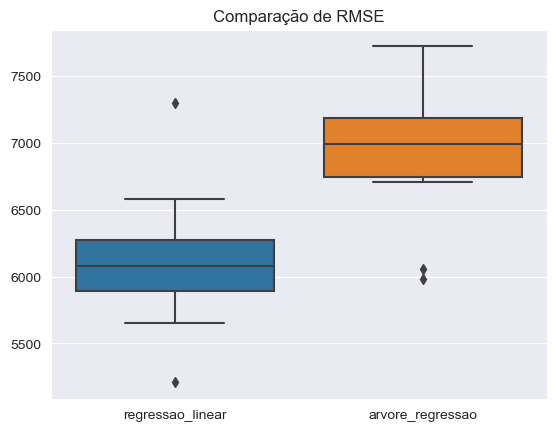

In [55]:
rmse = pd.DataFrame({'regressao_linear': valores_rmse_rl_sem_regiao, 'arvore_regressao': valores_rmse_arvore})

sns.boxplot(data=rmse).set_title("Comparação de RMSE")

## <a> Modelo Campeão! </a>

Agora que temos um modelo campeao, vamos treinar modelo na base de treinamento toda!


In [56]:
regressao_linear.fit(X_treino.drop(colunas_regiao, axis=1), y_treino)

LinearRegression()

In [57]:
regressao_linear.coef_

array([[1.18251723e+04, 1.21744207e+04, 2.13627215e+03, 2.36539033e+04,
        7.95178837e+00]])

In [58]:
df_coeficientes = pd.DataFrame(regressao_linear.coef_)
df_coeficientes.columns=regressao_linear.feature_names_in_
df_coeficientes

,age,bmi,children,smoker,female
0,11825.17,12174.42,2136.27,23653.90,7.95


In [59]:
!pip install statsmodels

In [60]:
# Extra: podemos calcular o p-valor dos coeficientes de cada regressão utilizando o pacote statsmodels
import statsmodels.api as sm

rl_statsmodels = sm.OLS(y_treino,X_treino.drop(colunas_regiao, axis=1))
resultado_fit = rl_statsmodels.fit()
p_valores = resultado_fit.summary2().tables[1]['P>|t|']
p_valores

age        0.00
bmi        0.00
children   0.07
smoker     0.00
female     0.21
Name: P>|t|, dtype: float64

Ou seja, os coeficientes para crianças e sexo não são estatisticamente válidos, devemos ter cautela ao analisar o impacto nos valores do plano de saúde. Mas idade, índice de massa corporal e se a pessoa fuma ou não, tá liberado! Se a estatística falou, tá falado :)

## <a> Finalmente </a>

Agora que temos nosso modelo final, podemos fazer inferências dos valores do plano de saúde no teste. Percebam que nunca utilizamos o teste PARA NADA, como deve ser.

In [61]:
# ver estimadores scikit learn
# estimador é treinado com fit
# estimador prediz com predict
precos_preditos = regressao_linear.predict(X_teste.drop(colunas_regiao, axis=1))
precos_preditos[:5]

array([[ 8554.81711589],
       [ 6973.58746745],
       [36798.60416104],
       [ 9417.88282303],
       [26871.68031081]])

In [62]:
len(precos_preditos)

268

In [63]:
y_teste.head()

,charges
764,9095.07
887,5272.18
890,29330.98
1293,9301.89
259,33750.29


In [64]:
predicoes_vs_real = pd.DataFrame({'predicao': precos_preditos.flatten(), 'real': y_teste.values.flatten()})
predicoes_vs_real['diferenca_abs'] = abs(predicoes_vs_real['predicao'] - predicoes_vs_real['real'])
predicoes_vs_real.head(20)

,predicao,real,diferenca_abs
0,8554.82,9095.07,540.25
1,6973.59,5272.18,1701.41
2,36798.60,29330.98,7467.62
3,9417.88,9301.89,115.99
4,26871.68,33750.29,6878.61
5,11097.38,4536.26,6561.12
6,145.28,2117.34,1972.06
7,16746.17,14210.54,2535.63
8,747.53,3732.63,2985.09
9,11153.68,10264.44,889.23


In [65]:
# Tudo muito bem, tudo muito bom. Mas será que uma simples média é melhor do 
# que nosso modelo? Vamos testar o r quadrado
from sklearn.metrics import r2_score

r2_score(y_true=y_teste, y_pred=precos_preditos)

0.7811302113434095

Até que 0,78 não é ruim, nosso modelo explica bastante a variável target

#### Vamos testar uma predição com inputs?

In [67]:
X_teste.drop(colunas_regiao, axis=1).columns

Index(['age', 'bmi', 'children', 'smoker', 'female'], dtype='object')

In [68]:
idade = input()

30


In [69]:
indice_massa_corporal = input()

30


In [70]:
criancas = input()

2


In [71]:
fumante = input("1 para fumante, 0 para não fumante: ")

1 para fumante, 0 para não fumante: 1


In [72]:
sexo = input("1 para mulher, 0 para homem: ")

1 para mulher, 0 para homem: 0


In [73]:
idade, indice_massa_corporal, criancas, fumante, sexo

('30', '30', '2', '1', '0')

In [74]:
# Realizando scaling das features
#scaler_sem_regiao = MinMaxScaler()
#scaler_sem_regiao.fit(X_treino.drop(colunas_regiao, axis=1))

# Completamos com 1,1,1 porque o X_treino original tinha colunas de região
features = [[idade, indice_massa_corporal, criancas, fumante, sexo, 1, 1, 1]]

# O scaler é lááááá do treino (nada de fitar de novo)
features = scaler.transform(features)
features

C:\Users\franc\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.26086957, 0.37772397, 0.4       , 1.        , 0.        ,
        1.        , 1.        , 1.        ]])

In [75]:
# Pegando somente as 5 features
features = features[:,:-3]
features

array([[0.26086957, 0.37772397, 0.4       , 1.        , 0.        ]])

In [76]:
# Resultado da predição!
regressao_linear.predict(features)

C:\Users\franc\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[29925.0834109]])

#### Como discutido anteriormente, a inclusão da variável que indica se a pessoa é fumante ou não parece ter um impacto significativo no valor final do plano. Vamos ajustar o valor correspondente à variável 'fumante' para 0 e avaliar se o modelo reflete de maneira precisa essa alteração.


In [79]:
fumante = 0

In [80]:
idade, indice_massa_corporal, criancas, fumante, sexo

('30', '30', '2', 0, '0')

In [82]:
# Completamos com 1,1,1 porque o X_treino original tinha colunas de região
features = [[idade, indice_massa_corporal, criancas, fumante, sexo, 1, 1, 1]]

# O scaler é lááááá do treino (nada de fitar de novo)
features = scaler.transform(features)
features = features[:,:-3]
features

C:\Users\franc\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.26086957, 0.37772397, 0.4       , 0.        , 0.        ]])

In [83]:
# Resultado da predição!
regressao_linear.predict(features)

C:\Users\franc\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[6271.18009616]])

### Conclusão

Com base em nossos testes, podemos concluir que o modelo que melhor se ajustou a este problema foi o de regressão linear, ignorando as informações regionais de acordo com o teste de validação cruzada. Além disso, nosso modelo alcançou uma precisão de 78%, o que é considerado bom, especialmente considerando a quantidade limitada de dados utilizados. Por fim, podemos afirmar que o modelo está coerente com a realidade, uma vez que os fumantes tendem a pagar mais pelo plano de saúde, conforme evidenciado em nossas análises.